### 아이리스 데이터를 이용한 결측치 처리 및 머신러닝 연습

In [33]:
import pandas as pd
import numpy as np

In [64]:
iris = pd.read_csv("null_iris_data.csv", encoding = "utf-8-sig")

In [65]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,NaN,3.5,NaN,0.2,setosa
1,4.9,NaN,1.4,0.2,setosa
2,4.7,3.2,NaN,NaN,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [72]:
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006667,3.454762,1.470455,0.246341
versicolor,5.863415,2.800000,4.280952,1.322727
virginica,6.522727,2.972340,5.520455,2.024444


In [86]:
iris["sepal_length"] = iris.sepal_length.fillna(value= np.round(iris.sepal_length.mean(),1))

In [87]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.8,3.5,NaN,0.2,setosa
1,4.9,NaN,1.4,0.2,setosa
2,4.7,3.2,NaN,NaN,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [88]:
iris["sepal_width"] = iris.sepal_width.fillna(value= np.round(iris.sepal_width.mean(),1))

In [89]:
iris["petal_length"] = iris.petal_length.fillna(value= np.round(iris.petal_length.mean(),1))

In [90]:
iris["petal_width"] = iris.petal_width.fillna(value= np.round(iris.petal_width.mean(),1))

In [91]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.8,3.5,3.7,0.2,setosa
1,4.9,3.1,1.4,0.2,setosa
2,4.7,3.2,3.7,1.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [92]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(iris, test_size = 0.3 )
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
41,4.5,2.3,1.3,1.2,setosa
98,5.1,2.5,3.0,1.1,versicolor
78,6.0,2.9,4.5,1.5,versicolor
123,6.3,2.7,4.9,1.8,virginica
134,6.1,2.6,5.6,1.4,virginica


In [93]:
iris_x  = iris.iloc[:,:-1]
iris_y = iris.iloc[:,-1]

train_x , test_x , train_y, test_y = train_test_split(iris_x, iris_y , test_size = 0.3 )

In [94]:
train_y.value_counts() , test_y.value_counts()

(setosa        36
 virginica     35
 versicolor    34
 Name: species, dtype: int64,
 versicolor    16
 virginica     15
 setosa        14
 Name: species, dtype: int64)

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
rf_model = RandomForestClassifier()
rf_model.fit(train_x , train_y ) # 학습 할 때는 x,y 둘다 사용해줘야함

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [97]:
rf_model.predict(test_x)

array(['virginica', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'virginica', 'setosa', 'virginica',
       'virginica', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'versicolor', 'virginica', 'setosa',
       'virginica', 'versicolor', 'virginica', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'versicolor'],
      dtype=object)

In [98]:
# 정확도
rf_model.score(test_x, test_y) 

0.8666666666666667

교수님 코드

In [75]:
iris_n = pd.read_csv("null_iris_data.csv", encoding = "utf-8-sig")

In [78]:
imbs = iris.groupby('species').mean()

In [82]:

imbs = iris.groupby('species').mean()

import math

def na2neam(x):
    for i in range(4):
        if(math.isnan(x[i])):
            x[i]=imbs.loc[x["species"], x.index[i]]
    return x 

iris_n2 = iris_n.apply(na2neam, axis=1)  # 데이타가 한 행씩 전달됨. 
iris_n2 

In [83]:
iris_n2 = iris_n.apply(na2neam, axis=1)  # 데이타가 한 행씩 전달됨. 
iris_n2 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.006667,3.500000,1.470455,0.200000,setosa
1,4.900000,3.454762,1.400000,0.200000,setosa
2,4.700000,3.200000,1.470455,0.246341,setosa
3,4.600000,3.100000,1.500000,0.200000,setosa
4,5.000000,3.600000,1.400000,0.200000,setosa
...,...,...,...,...,...
145,6.700000,3.000000,5.200000,2.300000,virginica
146,6.300000,2.500000,5.000000,1.900000,virginica
147,6.500000,3.000000,5.520455,2.000000,virginica
148,6.200000,3.400000,5.400000,2.300000,virginica


In [84]:
from sklearn.model_selection import train_test_split

iris_x  = iris_n2.iloc[:,:-1]
iris_y = iris_n2.iloc[:,-1]

train_x , test_x , train_y, test_y = train_test_split(iris_x, iris_y , test_size = 0.3 )

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(train_x , train_y ) # 학습 할 때는 x,y 둘다 사용해줘야함

rf_model.predict(test_x)
# 정확도
rf_model.score(test_x, test_y) 

0.9333333333333333

### 와인 데이터를 이용한 전처리 및 머신러닝

In [192]:
wine = pd.read_csv("이두인.csv",encoding = "utf-8-sig")

In [167]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1549 non-null   float64
 1   volatile acidity      1523 non-null   float64
 2   citric acid           1502 non-null   float64
 3   residual sugar        1501 non-null   float64
 4   chlorides             1499 non-null   float64
 5   free sulfur dioxide   1499 non-null   float64
 6   total sulfur dioxide  1499 non-null   float64
 7   density               1501 non-null   float64
 8   pH                    1502 non-null   float64
 9   sulphates             1500 non-null   float64
 10  alcohol               1499 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [124]:
wine["fixed"]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,NaN,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [159]:
wine_x = wine.iloc[:,:-1]
wine_x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,8.3,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [163]:
wine_y = wine.iloc[:,-1]
wine_y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [151]:
import matplotlib.pyplot as plt
%matplotlib inline

In [170]:
wine["fixed acidity"]

0        7.4
1        7.8
2        7.8
3       11.2
4        NaN
        ... 
1594     6.2
1595     5.9
1596     6.3
1597     5.9
1598     6.0
Name: fixed acidity, Length: 1599, dtype: float64

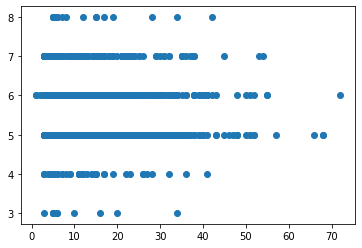

In [175]:
plt.scatter(wine["free sulfur dioxide"], wine_y)

In [181]:
a = wine.groupby("quality")

In [190]:
wine.set_index("quality").groupby(level=0).mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.892222,0.190000,2.635000,0.126778,11.000000,24.900000,0.997302,3.398000,0.570000,9.955000
4,7.782692,0.711000,0.170000,2.444898,0.092220,12.400000,35.200000,0.996602,3.383846,0.598462,10.257292
5,8.169406,0.577876,0.245972,2.511659,0.093610,17.068750,57.243671,0.997097,3.305730,0.622767,9.898984
6,8.368882,0.497791,0.273794,2.492905,0.085034,15.836120,40.731788,0.996589,3.317587,0.675515,10.642889
7,8.881026,0.402842,0.373118,2.709358,0.076827,13.902174,35.284946,0.996123,3.292432,0.739459,11.459330
8,8.566667,0.423333,0.391111,2.576471,0.068444,13.882353,34.470588,0.995212,3.269412,0.750000,12.111765


In [195]:
wine_gr = wine.groupby("quality")

In [198]:
# 내가 그룹 바이로 묶은 아이들을 볼 수 가있는 것. 

for name , subset in wine_gr:
    print(name,"\n", subset)

3 
       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
459            11.6             0.580         0.66            2.20      0.074   
517            10.4             0.610         0.49            2.10      0.200   
690             7.4             1.185         0.00            4.25      0.097   
832            10.4             0.440         0.42            1.50      0.145   
899             8.3             1.020         0.02            3.40        NaN   
1299            7.6             1.580         0.00            2.10      0.137   
1374            6.8               NaN          NaN            1.20      0.267   
1469            7.3             0.980         0.05            2.10      0.061   
1478            7.1             0.875         0.05            5.70      0.082   
1505            6.7             0.760         0.02            1.80      0.078   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
459                  10.0  

In [129]:
wine.

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [132]:
wine["fixed acidity"] = wine["fixed acidity"].fillna(value= np.round(wine["fixed acidity"].mean(),1))

In [143]:
wine["fixed acidity"] = wine["fixed acidity"].fillna(value= np.round(wine["fixed acidity"].mean(),1))
wine["volatile acidity"] = wine["volatile acidity"].fillna(value= np.round(wine["volatile acidity"].mean(),1))
wine["citric acid"] = wine["citric acid"].fillna(value= np.round(wine["citric acid"].mean(),1))
wine["residual sugar"] = wine["residual sugar"].fillna(value= np.round(wine["residual sugar"].mean(),1))

In [ ]:

imbs = iris.groupby('species').mean()

import math

def na2neam(x):
    for i in range(4):
        if(math.isnan(x[i])):
            x[i]=imbs.loc[x["species"], x.index[i]]
    return x 

iris_n2 = iris_n.apply(na2neam, axis=1)  # 데이타가 한 행씩 전달됨. 
iris_n2 

In [199]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1549 non-null   float64
 1   volatile acidity      1523 non-null   float64
 2   citric acid           1502 non-null   float64
 3   residual sugar        1501 non-null   float64
 4   chlorides             1499 non-null   float64
 5   free sulfur dioxide   1499 non-null   float64
 6   total sulfur dioxide  1499 non-null   float64
 7   density               1501 non-null   float64
 8   pH                    1502 non-null   float64
 9   sulphates             1500 non-null   float64
 10  alcohol               1499 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [145]:
from sklearn.model_selection import train_test_split

x  = wine.iloc[:,:-1]
y = wine.iloc[:,-1]

train_x , test_x , train_y, test_y = train_test_split(x, y , test_size = 0.3 )

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(train_x , train_y ) # 학습 할 때는 x,y 둘다 사용해줘야함

rf_model.predict(test_x)
# 정확도
rf_model.score(test_x, test_y) 

0.6895833333333333

In [147]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(1000,),)

mlp_model.fit(train_x , train_y) # 학습 할 때는 x,y 둘다 사용해줘야함)

mlp_model.predict(test_x)
# 정확도
mlp_model.score(test_x, test_y) 

0.5645833333333333

시각화하기

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

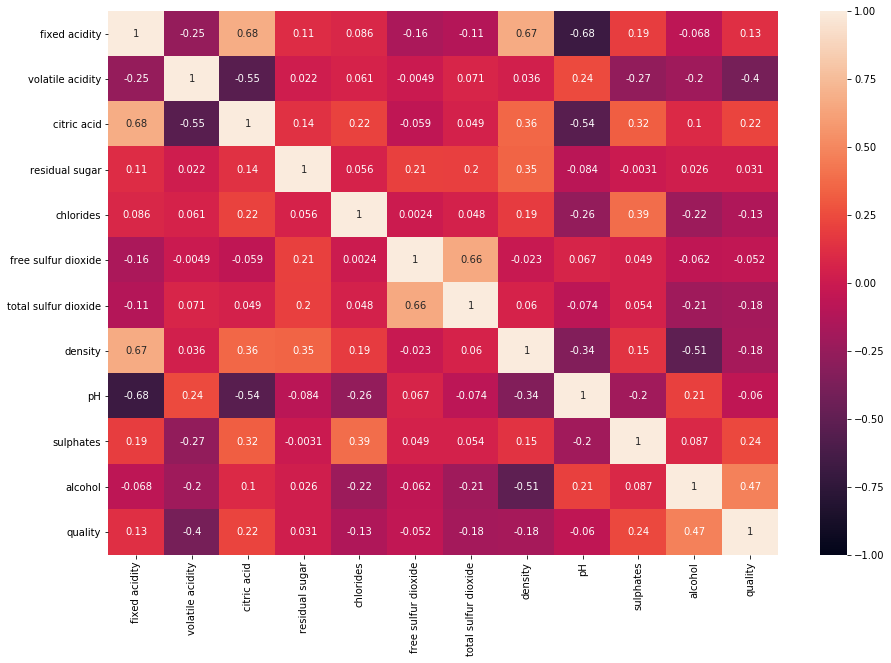

In [202]:
plt.figure(figsize = (15,10))
sns.heatmap(wine.corr(),vmin = -1, vmax= 1, annot = True)
plt.show()

In [ ]:
import missingno as 